### import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_columns', 40)  # показывать больше колонок

### Загрузка и первичный осмотр данных

In [9]:
fl = pd.read_csv('flights_from_Anapa_winter_2017.csv')
display(fl.sample(5))

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,model,total_passenger_seats,max_takeoff_weight,security_fare,takeoff_fare,parking_fare,actual_arrival,actual_departure,sheduled_flight_time,actual_flight_time,sold_tickets,passenger_service,total_amount,ticket_economy,ticket_comfort,ticket_business,fuel_consumption,fuel_price
82,136661,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-01-01T10:17:00Z,2017-01-01T09:27:00Z,50.0,50.0,96.0,231,759000.0,84.0,0.0,12.0,1700,48.8933
78,136645,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-01-05T10:20:00Z,2017-01-05T09:29:00Z,50.0,51.0,82.0,231,633000.0,73.0,0.0,9.0,1700,48.8933
77,136642,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-01-30T10:17:00Z,2017-01-30T09:28:00Z,50.0,49.0,64.0,231,531000.0,54.0,0.0,10.0,1700,48.8933
41,136387,PG0252,AAQ,SVO,Moscow,Boeing 737-300,130,62.82,317,412,20.6,2017-01-19T11:47:00Z,2017-01-19T10:08:00Z,100.0,99.0,121.0,231,1775000.0,109.0,0.0,12.0,2400,48.8933
11,136172,PG0252,AAQ,SVO,Moscow,Boeing 737-300,130,62.82,317,412,20.6,2017-01-15T11:44:00Z,2017-01-15T10:05:00Z,100.0,99.0,110.0,231,1617600.0,99.0,0.0,11.0,2400,48.8933


In [10]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              127 non-null    int64  
 1   flight_no              127 non-null    object 
 2   departure_airport      127 non-null    object 
 3   arrival_airport        127 non-null    object 
 4   arrival_city           127 non-null    object 
 5   model                  127 non-null    object 
 6   total_passenger_seats  127 non-null    int64  
 7   max_takeoff_weight     127 non-null    float64
 8   security_fare          127 non-null    int64  
 9   takeoff_fare           127 non-null    int64  
 10  parking_fare           127 non-null    float64
 11  actual_arrival         127 non-null    object 
 12  actual_departure       127 non-null    object 
 13  sheduled_flight_time   127 non-null    float64
 14  actual_flight_time     127 non-null    float64
 15  sold_t

In [11]:
fl.describe()

,flight_id,total_passenger_seats,max_takeoff_weight,security_fare,takeoff_fare,parking_fare,sheduled_flight_time,actual_flight_time,sold_tickets,passenger_service,total_amount,ticket_economy,ticket_comfort,ticket_business,fuel_consumption,fuel_price
count,127.000000,127.000000,127.000000,127.0,127.0,1.270000e+02,127.000000,127.000000,118.000000,127.0,1.180000e+02,118.000000,118.0,118.000000,127.000000,127.000000
mean,136533.574803,114.669291,54.950236,317.0,412.0,2.060000e+01,91.299213,91.377953,101.652542,231.0,1.176506e+06,90.864407,0.0,10.788136,2074.803150,47.844122
std,252.498327,16.523699,8.482165,0.0,0.0,4.993497e-14,64.000907,64.377474,14.295643,0.0,4.794251e+05,14.028003,0.0,1.395057,350.502701,1.113083
min,136119.000000,97.000000,45.880000,317.0,412.0,2.060000e+01,50.000000,49.000000,64.000000,231.0,5.310000e+05,54.000000,0.0,6.000000,1700.000000,46.672540
25%,136313.000000,97.000000,45.880000,317.0,412.0,2.060000e+01,50.000000,50.000000,95.000000,231.0,7.464000e+05,83.000000,0.0,10.000000,1700.000000,46.672540
50%,136540.000000,130.000000,62.820000,317.0,412.0,2.060000e+01,100.000000,99.000000,97.000000,231.0,1.081650e+06,85.500000,0.0,11.000000,2400.000000,48.893300
75%,136757.500000,130.000000,62.820000,317.0,412.0,2.060000e+01,100.000000,100.000000,111.750000,231.0,1.625850e+06,101.750000,0.0,12.000000,2400.000000,48.893300
max,136956.000000,130.000000,62.820000,317.0,412.0,2.060000e+01,305.000000,312.000000,130.000000,231.0,1.886000e+06,118.000000,0.0,12.000000,2400.000000,48.893300


In [12]:
#Проверим датасет df_train на наличие дубликатов:
if len(fl)>len(fl.drop_duplicates()):
    print('Дубликаты есть')
    display(fl[fl.duplicated()])
else:
    print('Дубликатов нет')

Дубликатов нет


**Подробнее по признакам:**
* flight_id: Идентификатор рейса
* flight_no: Номер рейса
* departure_airport: Аэропорт отправления
* arrival_airport: Аэропорт прибытия
* arrival_city: Город прибытия
* model: Модель самолёта
* total_passenger_seats: Общее количество пассажирских мест
* max_takeoff_weight: Максимальная взлётная масса (мвм), в тоннах
* security_fare: Обеспечение авиационной безопасности руб/т мвм 
https://fas.gov.ru/upload/other/протокол%20№%2032%20от%2003.08.2017.pdf
* takeoff_fare: Сбор за взлёт-посадку руб/т мвм
* parking_fare: Сбор за стоянку, 5%/час от сбора за взлет-посадку
* actual_arrival: Фактическое время прилёта
* actual_departure: Фактическое время вылета
* sheduled_flight_time: Запланированное время полёта
* actual_flight_time: Актуальное время полёта
* sold_tickets: Количество проданных билетов на рейс
* passenger_service: Тарифы аэропорта и аэровокзала на обслуживание пассажиров, руб/чел https://fas.gov.ru/upload/other/протокол%20№%2032%20от%2003.08.2017.pdf
* total_amount: Сумма, полученная за продажу билетов на рейс
* ticket_economy: Проданное количество билетов класса 'Economy'
* ticket_comfort: Проданное количество билетов класса 'Comfort'
* ticket_business: Проданное количество билетов класса 'Business'
* fuel_consumption: Расход топлива определенной моделью самолёта, кг/час полёта  
* fuel_price: Стоимость топлива в аэропорту вылета, руб/кг https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329

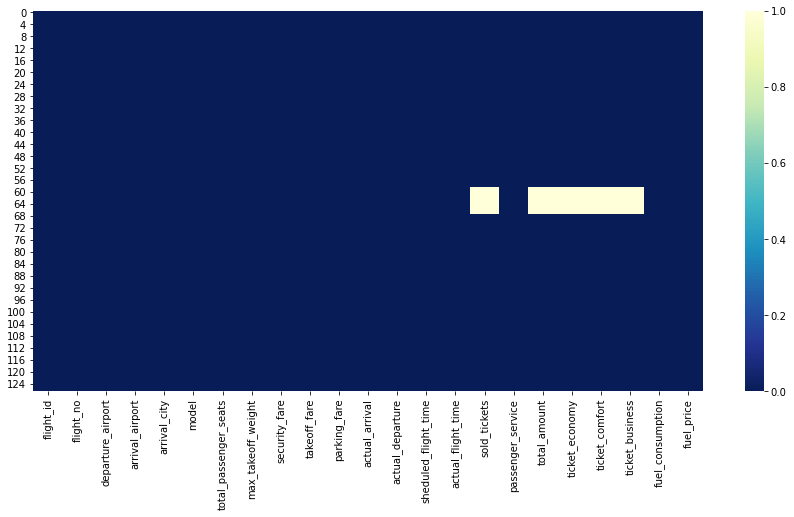

In [13]:
# Посмотрим как распределены пропуски по датасету:
plt.figure(figsize=(15, 7))# размер тепловой карты
sns.heatmap(fl.isnull(), cmap="YlGnBu_r");

Мы видим, что на некоторых рейсах отсутствует информация о проданных билетах. Причём, отсутствующая информация подозрительно сгруппирована. Посмотрим, сколько их.

In [14]:
fl.isnull().sum() 

flight_id                0
flight_no                0
departure_airport        0
arrival_airport          0
arrival_city             0
model                    0
total_passenger_seats    0
max_takeoff_weight       0
security_fare            0
takeoff_fare             0
parking_fare             0
actual_arrival           0
actual_departure         0
sheduled_flight_time     0
actual_flight_time       0
sold_tickets             9
passenger_service        0
total_amount             9
ticket_economy           9
ticket_comfort           9
ticket_business          9
fuel_consumption         0
fuel_price               0
dtype: int64

Предположим, что у нас нет информации по проданным билетам для рейсов по какому-то одному направлению. Ниже проверим эту гипотезу

# 
### Aнализ переменных и создание новых признаков
#### 1. flight_id 

In [15]:
fl.flight_id.nunique()

127

flight_id - это набор уникальных значений рейсов

#### 2. flight_no

In [16]:
fl.flight_no.nunique()

3

Всего из Анапы летают 3 рейса. Посмотрим какие и сколько раз за три зимних месяца

In [17]:
fl.flight_no.value_counts()

PG0480    59
PG0252    59
PG0194     9
Name: flight_no, dtype: int64

Проверим нашу гипотезу, что на рейсах с номером PG0194 нет информации о проданных билетах

In [18]:
fl[(fl.flight_no == 'PG0194')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 59 to 67
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              9 non-null      int64  
 1   flight_no              9 non-null      object 
 2   departure_airport      9 non-null      object 
 3   arrival_airport        9 non-null      object 
 4   arrival_city           9 non-null      object 
 5   model                  9 non-null      object 
 6   total_passenger_seats  9 non-null      int64  
 7   max_takeoff_weight     9 non-null      float64
 8   security_fare          9 non-null      int64  
 9   takeoff_fare           9 non-null      int64  
 10  parking_fare           9 non-null      float64
 11  actual_arrival         9 non-null      object 
 12  actual_departure       9 non-null      object 
 13  sheduled_flight_time   9 non-null      float64
 14  actual_flight_time     9 non-null      float64
 15  sold_tic

Это действительно рейсы с номером PG0194. Поскольку по ним нет никаких статистических данных, мы не знаем стоимость билета на данный рейс и сколько их было продано, мы их исключим из анализа

In [19]:
fl = fl.dropna()

#### 3. actual_arrival и actual_departure

Переведем столбцы **'actual_arrival'** и **'actual_departure'** из типа object в формат **datetime**

In [20]:
fl['actual_arrival'] = pd.to_datetime(fl['actual_arrival'])
fl['actual_departure'] = pd.to_datetime(fl['actual_departure']) 

Создадим столбец **'month'**, где отдельно выделим из **'actual_departure'** месяц

In [21]:
fl['month'] = fl['actual_departure'].apply(lambda x: x.strftime('%B'))

#### 4. Посчитаем аэропортовые сборы

Сделаем допущение, что самолет находится в аэропорту города Анапа не более двух часов до следующего рейса (это необязательно обратный рейс). Создадим новый признак **'total_fare'**

In [23]:
fl['total_fare'] = round(fl['max_takeoff_weight']*(fl['security_fare'] + fl['takeoff_fare'] + 2*fl['parking_fare']
                                                  ) + fl['sold_tickets']*fl['passenger_service'],0)

<AxesSubplot:title={'center':'total_fare & model'}, xlabel='model'>

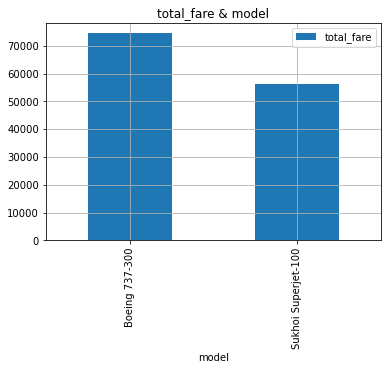

In [24]:
# Посмотрим на сколько отличается обслуживание для моделей воздушных судов в нашем датасете
fl.pivot_table(values = 'total_fare', 
               index = 'model', 
               aggfunc = 'mean').plot(kind = 'bar', grid = True, title = 'total_fare & model')

Мы видим, что расходы на обслуживание в аэропорту самолёта с большей максимальной взлётной массой выше. И признак **total_fare** ещё неполный, поскольку есть ещё приземление и обслуживание воздушного судна в аэропорту прибытия, которое мы тут не рассматриваем, так как не удалось найти достоверные данные по тарифам за 2017 год в аэропорту Белгорода

#### 5. Посчитаем расходы на топливо

Создадим новый признак **'total_fuel_price'**

In [25]:
fl['total_fuel_price'] = round(fl['actual_flight_time']/60*fl['fuel_consumption']*fl['fuel_price'],0)

<AxesSubplot:title={'center':'total_fuel_price & город прилёта'}, xlabel='arrival_city'>

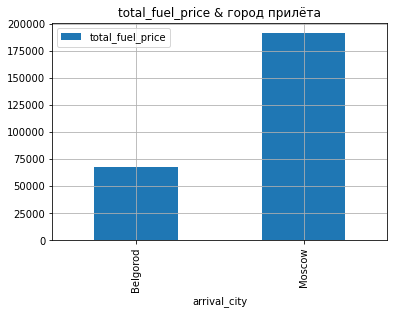

In [26]:
# Посмотрим на графике, насколько в среднем отличаются затраты на авиационное топливо по направлениям (за рейс)
fl.pivot_table(values = 'total_fuel_price', 
               index = 'arrival_city', 
               aggfunc = 'mean').plot(kind = 'bar', grid = True, title = 'total_fuel_price & город прилёта')

<AxesSubplot:title={'center':'total_fuel_price & месяц'}, xlabel='arrival_city,month'>

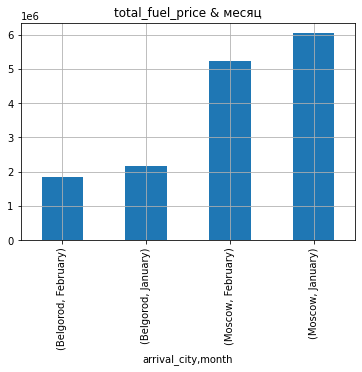

In [27]:
# Посмотрим то же самое с разбивкой по месяцам
fl.groupby(by = ['arrival_city', 'month']
          )['total_fuel_price'].sum().plot(kind='bar', grid=True, title='total_fuel_price & месяц')

- Мы видим, что изначально в нашем датасете отсутствует информация о полётах из Анапы в декабре 2017 года. 
- Затраты на топливо по обоим направлениям выше в январе. Цены на авиатопливо выше в январе, но разница в большей степени объясняется тем, что в январе больше дней и, соответственно, больше рейсов. Проверим это:

<AxesSubplot:title={'center':'flights & месяц'}, xlabel='arrival_city,month'>

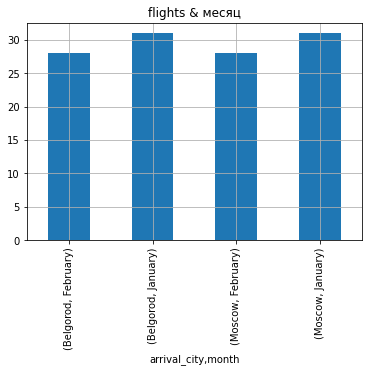

In [28]:
fl.groupby(by = ['arrival_city', 'month']
          )['flight_id'].count().plot(kind='bar', grid=True, title='flights & месяц')

Так и есть, так как рейсы осуществляются ежедневно, получается, что в январе 31 рейс, а в феврале 28

Создадим столбец **'ssj_100_SVO'**, в котором рассчитаем затраты на топливо для самолёта **Sukhoi Superjet-100**, так если бы он летел в Москву из Анапы. Это нужно нам для сравнения затрат на авиатопливо для разных моделей самолётов на одном направлении:

In [29]:
fl['ssj_100_SVO'] = round(fl['actual_flight_time']/60*1700*fl['fuel_price'],0)

In [30]:
# Суммарные затраты на топливо за два месяца самолета Sukhoi Superjet-100 по маршруту Анапа - Москва
s = fl[(fl['arrival_airport'] == 'SVO')].ssj_100_SVO.sum()
s

7983360.0

In [31]:
# Суммарные затраты на топливо за два месяца самолета Boeing 737-300 по маршруту Анапа - Москва
b = fl[(fl['arrival_airport'] == 'SVO')].total_fuel_price.sum()
b

11270614.0

In [32]:
# Посчитаем экономию на топливе в процентах (за два месяца), если бы в Москву рейс совершал не Boeing 737-300, 
# а Sukhoi Superjet-100:
round((b - s)/b*100,2)

29.17

#### 6. Посчитаем разницу между выручкой от билетов и расходами на топливо и аэропортовые сборы

Мы тут очень сильно упрощаем формулу, поскольку в расходы можно записать, например, зарплату персонала, страхование рейса(воздушного судна), стоимость технического обслуживания, выплаты по кредиту или лизингу и много ещё чего.

Создадим новый признак **'revenue'**

In [33]:
fl['revenue'] = fl['total_amount'] - fl['total_fuel_price'] - fl['total_fare']

<AxesSubplot:title={'center':'revenue & direction & месяц'}, xlabel='arrival_city,month'>

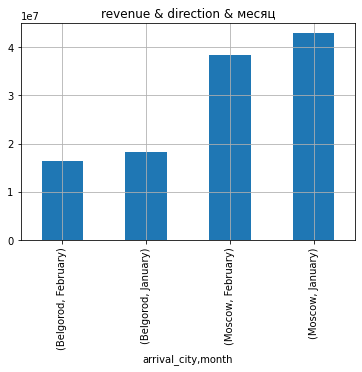

In [34]:
# Посмотрим распределение суммарного revenue по направлениям и месяцам
fl.groupby(by = ['arrival_city', 'month']
          )['revenue'].sum().plot(kind='bar', grid=True, title='revenue & direction & месяц')

Здесь также вполне объяснимо различие по месяцам из-за разницы в количестве полётов

#### 7. Посмотрим наполняемость на рейсах в зимние месяцы

- Сколько осталось нераспроданных билетов в процентах от общего количества пассажирских мест?
- Создадим новый признак **'not_sold_tickets%'**

In [35]:
fl['not_sold_tickets%'] = (fl['total_passenger_seats'] - fl['sold_tickets'])/fl['total_passenger_seats']*100

<AxesSubplot:title={'center':'Нераспроданные билеты,% & город прилёта'}, xlabel='arrival_city'>

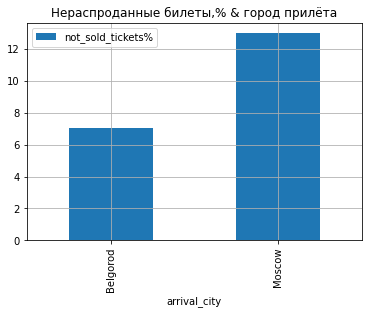

In [36]:
# Посмотрим на графике, сколько в среднем остаётся нераспроданных билетов на рейсы по направлениям
fl.pivot_table(values = 'not_sold_tickets%', 
               index = 'arrival_city', 
               aggfunc = 'mean').plot(kind = 'bar', grid = True, title = 'Нераспроданные билеты,% & город прилёта')

<AxesSubplot:title={'center':'not_sold_tickets% & месяц'}, xlabel='arrival_city,month'>

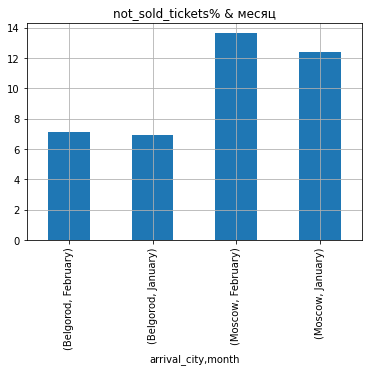

In [37]:
# Теперь посмотрим на графике, сколько остаётся нераспроданных билетов на рейсы по направлениям в разные месяца
fl.groupby(by = ['arrival_city', 'month']
          )['not_sold_tickets%'].mean().plot(kind='bar', grid=True, title='not_sold_tickets% & месяц')

Ситуация с проданными билетами хуже у рейсов, летающих в Москву, и у всех рейсов в феврале немного хуже чем в январе. Здесь уже нет влияния количества рейсов в конкретном месяце, поскольку мы смотрим среднее

#### 8. Классы билетов (ticket_economy, ticket_business, ticket_comfort)

In [38]:
fl.ticket_comfort.sum()

0.0

В нашем датасете нет ни одного проданного билета класса комфорт, поэтому мы не будем их рассматривать

In [39]:
eticket_svo = fl[(fl['arrival_airport'] == 'SVO')].groupby(by = 'month'
                                                          )['ticket_economy'].agg(['min','max','mean']).reset_index()
bticket_svo = fl[(fl['arrival_airport'] == 'SVO')].groupby(by = 'month'
                                                          )['ticket_business'].agg(['min','max','mean']).reset_index()
eticket_ego = fl[(fl['arrival_airport'] == 'EGO')].groupby(by = 'month'
                                                          )['ticket_economy'].agg(['min','max','mean']).reset_index()
bticket_ego = fl[(fl['arrival_airport'] == 'EGO')].groupby(by = 'month'
                                                          )['ticket_business'].agg(['mean','max','min']).reset_index()

Text(0.5, 1.0, 'Класс Business (EGO)')

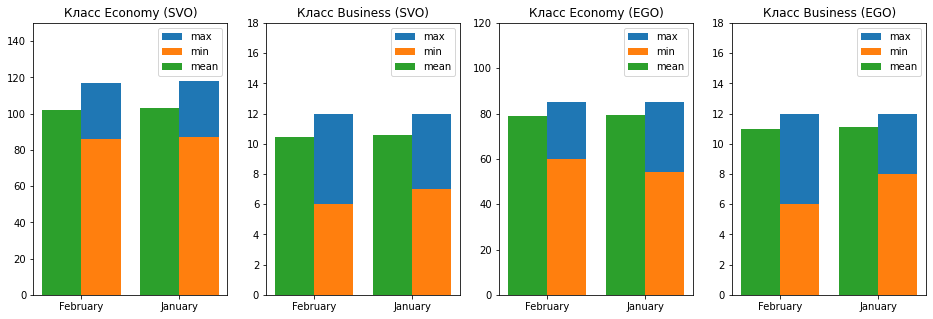

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(16,5))
axes[0].bar(x = eticket_svo['month'], height = eticket_svo['max'], width = 0.4, align = 'edge', label = 'max')
axes[0].bar(x = eticket_svo['month'], height = eticket_svo['min'], width = 0.4, align = 'edge', label = 'min')
axes[0].bar(x = eticket_svo['month'], height = eticket_svo['mean'], width = -0.4, align = 'edge', label = 'mean')
axes[0].set_ylim(0, 150)
axes[0].legend(loc = 1)
axes[0].set_title('Класс Economy (SVO)')

axes[1].bar(x = bticket_svo['month'], height = bticket_svo['max'], width = 0.4, align = 'edge', label = 'max')
axes[1].bar(x = bticket_svo['month'], height = bticket_svo['min'], width = 0.4, align = 'edge', label = 'min')
axes[1].bar(x = bticket_svo['month'], height = bticket_svo['mean'], width = -0.4, align = 'edge', label = 'mean')
axes[1].set_ylim(0, 18)
axes[1].legend(loc = 1)
axes[1].set_title('Класс Business (SVO)')

axes[2].bar(x = eticket_ego['month'], height = eticket_ego['max'], width = 0.4, align = 'edge', label = 'max')
axes[2].bar(x = eticket_ego['month'], height = eticket_ego['min'], width = 0.4, align = 'edge', label = 'min')
axes[2].bar(x = eticket_ego['month'], height = eticket_ego['mean'], width = -0.4, align = 'edge', label = 'mean')
axes[2].set_ylim(0, 120)
axes[2].legend(loc = 1)
axes[2].set_title('Класс Economy (EGO)')

axes[3].bar(x = bticket_ego['month'], height = bticket_ego['max'], width = 0.4, align = 'edge', label = 'max')
axes[3].bar(x = bticket_ego['month'], height = bticket_ego['min'], width = 0.4, align = 'edge', label = 'min')
axes[3].bar(x = bticket_ego['month'], height = bticket_ego['mean'], width = -0.4, align = 'edge', label = 'mean')
axes[3].set_ylim(0, 18)
axes[3].legend(loc = 1)
axes[3].set_title('Класс Business (EGO)')

In [41]:
# Столько было куплено билетов класса Economy по направлению Анапа-Москва
fl[((fl.arrival_airport == 'SVO'))].ticket_economy.sum()

6054.0

In [42]:
# Посчитаем, сколько (за два зимних месяца) необходимо пустить дополнительных рейсов при замене модели самолёта
round((fl[((fl.arrival_airport == 'SVO'))
  ].ticket_economy.sum() - fl[(fl.model == 'Sukhoi Superjet-100'
                              )].ticket_economy.max()*59)/fl[(fl.model == 'Sukhoi Superjet-100'
                                                             )].ticket_economy.max(),0)

12.0

### Можно уже сделать предварительные выводы и дать рекомендации
#### Анапа-Москва
Поскольку наполняемость пассажирами самолета модели **Boeing 737-300**, осуществляющего в зимние месяцы (январь, февраль) ежедневные полёты по маршруту **Анапа - Москва**, составляет порядка **87 %**, есть смысл большую часть рейсов осуществлять самолётом **Sukhoi Superjet-100**, который экономичнее в расходе топлива, а также экономичнее в плане потребления услуг аэропортов. И если стоимость билетов на **Sukhoi Superjet-100** будет сравнима со стоимостью билетов на **Boeing 737-300**, то прибыль авиакомпании точно не упадет. А освободившиеся самолеты **Boeing 737-300** можно направить на другие направления, где наполняемость будет близка к 100%. Небольшая ремарка: технические характеристики самолета **Sukhoi Superjet-100** позволяют ему летать на расстояния от 3048 км до 4578 км, что делает его приемлемой заменой на этом направлении.

**Один нюанс с требуемым количеством пассажирских мест!**

Даже если на всех рейсах в Москву заменить **Boeing 737-300** на **Sukhoi Superjet-100**, запрашиваемых пассажирских мест будет не хватать, и это касается исключительно мест класса **Economy**, поскольку в салонах самолетов одинаковое количество мест класса **Business** (12), и разница в местах в салоне **Economy** составляет 33 места. Но в реалиях слабой загруженности зимних месяцев на этом направлении нехватка мест составит 16-17 в сутки. Выход из сложившейся ситуации пустить по данному направлению один дополнительный рейс раз в пять дней, который полностью покроет недостаток пассажирских мест (в салоне SSJ-100 85 мест класса Economy *(17*5 = 85)).*

#### Анапа-Белгород
Направление Анапа-Белгород можно не трогать, так как невыкупленных билетов около 7 %:

In [43]:
(fl[((fl.arrival_airport == 'EGO'))
  ].total_passenger_seats.sum() - fl[((fl.arrival_airport == 'EGO'))
                                    ].ticket_economy.sum() - fl[((fl.arrival_airport == 'EGO'))
                                    ].ticket_business.sum())/fl[((fl.arrival_airport == 'EGO'))
                                    ].total_passenger_seats.sum()*100

7.024287960859689

А можно убрать один рейс в две недели (всего 4 рейса за 2 месяца) и тогда авиакомпания перевезёт всех пассажиров и сэкономит на топливе

In [44]:
fl.sample(5)

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,model,total_passenger_seats,max_takeoff_weight,security_fare,takeoff_fare,parking_fare,actual_arrival,actual_departure,sheduled_flight_time,actual_flight_time,sold_tickets,passenger_service,total_amount,ticket_economy,ticket_comfort,ticket_business,fuel_consumption,fuel_price,month,total_fare,total_fuel_price,ssj_100_SVO,revenue,not_sold_tickets%
56,136479,PG0252,AAQ,SVO,Moscow,Boeing 737-300,130,62.82,317,412,20.6,2017-02-21 11:47:00+00:00,2017-02-21 10:08:00+00:00,100.0,99.0,122.0,231,1738400.0,112.0,0.0,10.0,2400,46.67254,February,76566.0,184823.0,130916.0,1477011.0,6.153846
77,136642,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-01-30 10:17:00+00:00,2017-01-30 09:28:00+00:00,50.0,49.0,64.0,231,531000.0,54.0,0.0,10.0,1700,48.89330,January,50121.0,67880.0,67880.0,412999.0,34.020619
74,136620,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-02-17 10:19:00+00:00,2017-02-17 09:30:00+00:00,50.0,49.0,79.0,231,613500.0,70.0,0.0,9.0,1700,46.67254,February,53586.0,64797.0,64797.0,495117.0,18.556701
115,136875,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-02-16 10:19:00+00:00,2017-02-16 09:29:00+00:00,50.0,50.0,97.0,231,765300.0,85.0,0.0,12.0,1700,46.67254,February,57744.0,66119.0,66119.0,641437.0,0.000000
106,136827,PG0480,AAQ,EGO,Belgorod,Sukhoi Superjet-100,97,45.88,317,412,20.6,2017-02-18 10:17:00+00:00,2017-02-18 09:26:00+00:00,50.0,51.0,97.0,231,765300.0,85.0,0.0,12.0,1700,46.67254,February,57744.0,67442.0,67442.0,640114.0,0.000000
